# Here we compare the dimensions of a regular STFT and the AutoEncoder coding layer

In [1]:
import sys
import os
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import librosa as lib
import soundfile as sf
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from librosa import display

(10240,) 8000
(129, 161)
(100.916-5.37929j)
(-193.131-0j)
DIMENSION OF STFT =  (129, 161)


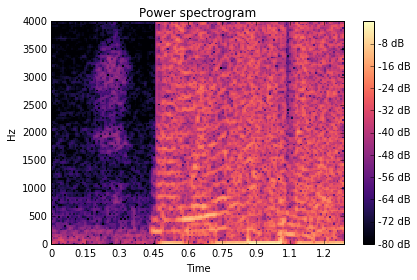

In [16]:
signal, fs = sf.read('../original.flac')
print signal.shape, fs
X = lib.core.stft(signal, n_fft=256, hop_length=64)
print X.shape
print np.amax(X)
print np.amin(X)
display.specshow(lib.amplitude_to_db(X,ref=np.max),y_axis='linear', x_axis='time', sr=fs,  hop_length=64)
print 'DIMENSION OF STFT = ', X.shape
plt.title('Power spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()
nb_bins_stft =  X.shape[0]*X.shape[1]

In [17]:
N = 256
pooling = 256
window = 1024
T = signal.shape[0]
conv_2d_outputdim = (T, N)
pooling_output = (T/pooling, N)
print pooling_output
nb_bins_autoenc =  T*N/pooling
print nb_bins_autoenc
reduction = float(nb_bins_stft)/float(nb_bins_autoenc)
print reduction, 'times smaller'

(40, 256)
10240
2.02822265625 times smaller


INFO:tensorflow:Restoring parameters from /home/anthony/das/log/pretraining/AdaptiveNet-noisy-breeze-3898-N=256--alpha=0.01--batch_size=16--beta=0.05--chunk_size=20480--maxpool=256--optimizer=Adam--reg=0.001--rho=0.01--same_filter=True--smooth_size=10--type=pretraining--window=1024-/model.ckpt
(40, 256)
11.3448
-6.96224


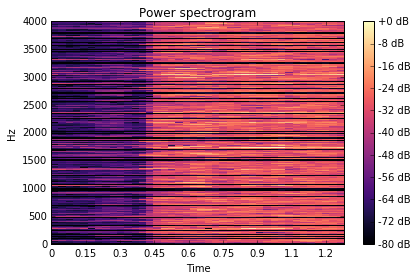

In [9]:
import os
import tensorflow as tf
import config

full_id = "AdaptiveNet-noisy-breeze-3898-N=256--alpha=0.01--batch_size=16--beta=0.05--chunk_size=20480--maxpool=256--optimizer=Adam--reg=0.001--rho=0.01--same_filter=True--smooth_size=10--type=pretraining--window=1024-"
model_meta_path = os.path.join(config.log_dir, "pretraining", full_id, 'model.ckpt.meta')
model_path = os.path.join(config.log_dir, "pretraining", full_id, 'model.ckpt')

sess = tf.Session()

importer = tf.train.import_meta_graph(model_meta_path)
importer.restore(sess, model_path)

graph = tf.get_default_graph()

ops = graph.get_operations()
pooled = [ v.values()[0] for v in ops if ('MaxPool' in v.name and 'optimize' not in v.name)][0]

mix_in = graph.get_tensor_by_name('mix_input:0')
non_mix_in = graph.get_tensor_by_name('non_mix_input:0')

X_in = signal[np.newaxis, :]
X_non_in = np.concatenate([X_in[:, np.newaxis, :], X_in[:, np.newaxis, :]], 1)
with sess.as_default():
    p = sess.run(pooled, feed_dict={mix_in:X_in, non_mix_in:X_non_in})
    p = p[0,:,:,0]
    print p.shape
print np.amax(p)
print np.amin(p)
display.specshow(lib.amplitude_to_db(np.transpose(p),ref=np.max),y_axis='linear', x_axis='time', sr=fs, hop_length=256)
plt.title('Power spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()
nb_bins_stft =  X.shape[0]*X.shape[1]

